In [1]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
import seaborn as sns

# Initialize an empty list to store DataFrames
data_frames = []

# Walk through the home directory
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        # Construct the full path of the file
        file_path = os.path.join(dirname, filename)
        
        # Check if the file is a CSV file (you can modify this condition based on your file format)
        if file_path.endswith('.csv'):
            # Read the CSV file into a DataFrame
            df = pd.read_csv(file_path)
            
            # Append the DataFrame to the list
            data_frames.append(df)

# Concatenate all DataFrames in the list into a single DataFrame
data = pd.concat(data_frames, ignore_index=True)

# Display the final DataFrame
print(data)


         arrival_time        start_time                    finish_time  \
0     30-03-2023 0.10   30-03-2023 0.10  2023-03-30 00:22:44.800000000   
1     30-03-2023 0.10   30-03-2023 0.16  2023-03-30 00:25:53.200000000   
2     30-03-2023 0.10   30-03-2023 0.16  2023-03-30 00:25:48.400000000   
3     30-03-2023 0.10   30-03-2023 0.14  2023-03-30 00:27:23.200000000   
4     30-03-2023 0.10   30-03-2023 0.15  2023-03-30 00:31:21.400000000   
..                ...               ...                            ...   
555  30-03-2023 22.00  30-03-2023 22.02  2023-03-30 22:16:59.800000000   
556  30-03-2023 22.00  30-03-2023 22.10  2023-03-30 22:13:56.200000000   
557  30-03-2023 22.00  30-03-2023 22.00  2023-03-30 22:05:35.799999999   
558  30-03-2023 23.54  30-03-2023 23.54  2023-03-31 00:00:42.400000000   
559  30-03-2023 23.54  30-03-2023 23.58  2023-03-31 00:17:23.200000000   

     wait_time  queue_length  
0        12.68            28  
1         9.82            28  
2         9.74    

In [2]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 560 entries, 0 to 559
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   arrival_time  560 non-null    object 
 1   start_time    560 non-null    object 
 2   finish_time   560 non-null    object 
 3   wait_time     560 non-null    float64
 4   queue_length  560 non-null    int64  
dtypes: float64(1), int64(1), object(3)
memory usage: 22.0+ KB


In [3]:
import pandas as pd

# Assuming data is your DataFrame
# Display the column names to verify their correctness
print("Column Names:", data.columns)

# Convert the 'arrival_time' and 'start_time' columns to datetime with specified format
data['arrival_time'] = pd.to_datetime(data['arrival_time'], format='%d-%m-%Y %H.%M')
data['start_time'] = pd.to_datetime(data['start_time'], format='%d-%m-%Y %H.%M')

# Calculate the waiting time as the difference between 'start_time' and 'arrival_time'
data['waiting_time'] = (data['start_time'] - data['arrival_time']).dt.total_seconds()

# Verify the results
print(data[['arrival_time', 'start_time', 'waiting_time']].head())

Column Names: Index(['arrival_time', 'start_time', 'finish_time', 'wait_time',
       'queue_length'],
      dtype='object')
         arrival_time          start_time  waiting_time
0 2023-03-30 00:10:00 2023-03-30 00:10:00           0.0
1 2023-03-30 00:10:00 2023-03-30 00:16:00         360.0
2 2023-03-30 00:10:00 2023-03-30 00:16:00         360.0
3 2023-03-30 00:10:00 2023-03-30 00:14:00         240.0
4 2023-03-30 00:10:00 2023-03-30 00:15:00         300.0


In [4]:
# Convert 'wait_time' to numeric, coercing errors to NaN
df['waiting_time'] = pd.to_numeric(df['wait_time'], errors='coerce')

# Drop rows with NaN values in 'waiting_time'
df = df.dropna(subset=['waiting_time'])

In [5]:
# Convert 'waiting_time' to numeric, coercing errors to NaN
df['waiting_time'] = pd.to_numeric(df['waiting_time'], errors='coerce')

# Drop rows with NaN values in 'waiting_time'
df = df.dropna(subset=['waiting_time'])

* **Time Series Analysis:**
1. *Plot the queue length over time to identify patterns or trends.*
1. *Analyze the waiting time variation throughout the day.*

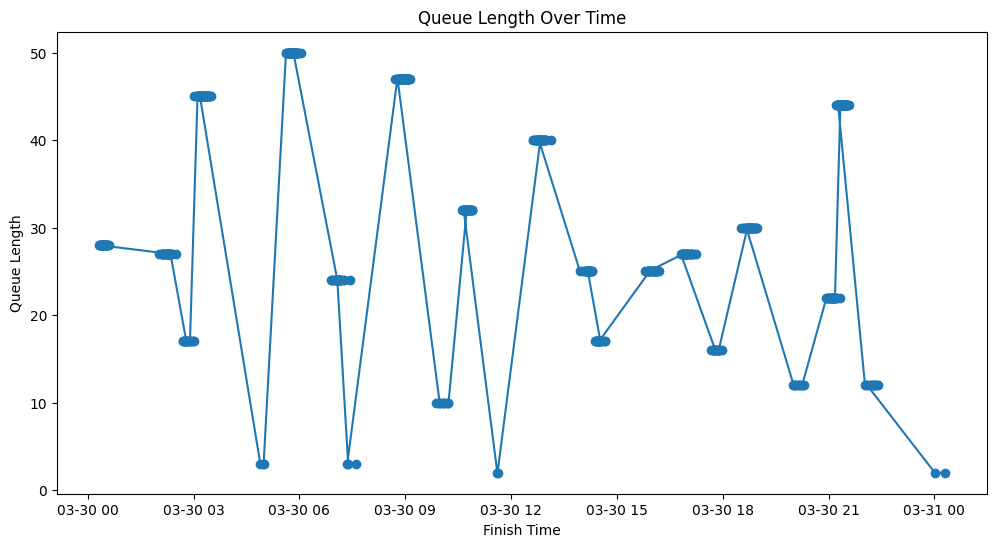

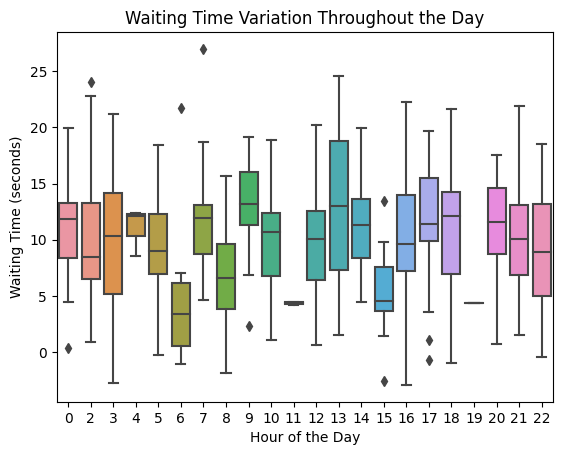

In [6]:
# Convert 'finish_time' to datetime
df['finish_time'] = pd.to_datetime(df['finish_time'])

# Plot queue length over time
plt.figure(figsize=(12, 6))
plt.plot(df['finish_time'], df['queue_length'], marker='o', linestyle='-')
plt.title('Queue Length Over Time')
plt.xlabel('Finish Time')
plt.ylabel('Queue Length')
plt.show()

# Analyze waiting time variation throughout the day
df['hour'] = df['finish_time'].dt.hour
sns.boxplot(x='hour', y='waiting_time', data=df)
plt.title('Waiting Time Variation Throughout the Day')
plt.xlabel('Hour of the Day')
plt.ylabel('Waiting Time (seconds)')
plt.show()

* **Statistical Summary:**

1. *Generate descriptive statistics for numeric columns.*

In [7]:
# Descriptive statistics
stats = df.describe()
print(stats)

                         finish_time   wait_time  queue_length  waiting_time  \
count                            560  560.000000    560.000000    560.000000   
mean   2023-03-30 11:29:43.021071360   10.107911     32.132143     10.107911   
min       2023-03-30 00:19:27.400000   -2.930000      2.000000     -2.930000   
25%    2023-03-30 05:46:51.750000128    6.527500     24.750000      6.527500   
50%              2023-03-30 10:49:47   10.120000     30.000000     10.120000   
75%       2023-03-30 17:08:23.300000   13.322500     45.000000     13.322500   
max       2023-03-31 00:17:23.200000   26.980000     50.000000     26.980000   
std                              NaN    5.032406     12.418048      5.032406   

             hour  
count  560.000000  
mean    10.887500  
min      0.000000  
25%      5.000000  
50%     10.000000  
75%     17.000000  
max     22.000000  
std      6.760391  


* **Waiting Time Distribution by Queue Length:**

1. *Visualize the distribution of waiting time for different queue lengths.*

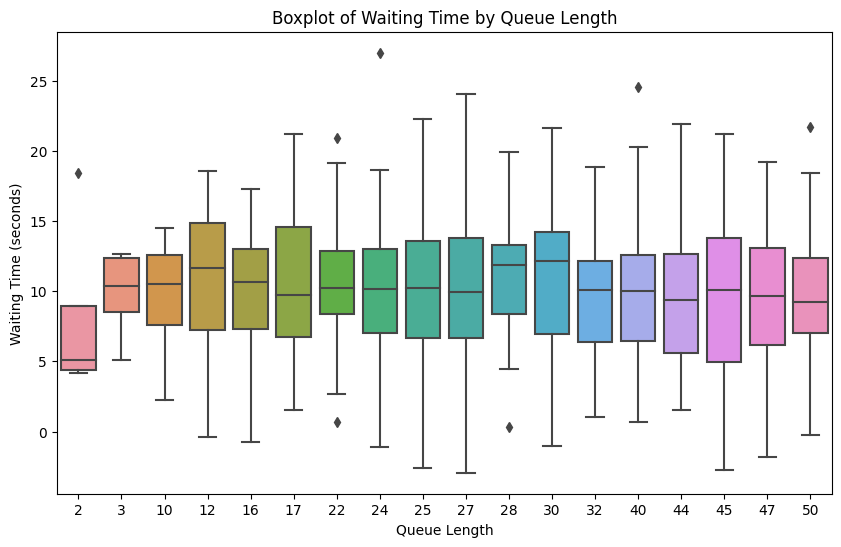

In [8]:
plt.figure(figsize=(10, 6))
sns.boxplot(x=df['queue_length'], y=df['waiting_time'])
plt.title('Boxplot of Waiting Time by Queue Length')
plt.xlabel('Queue Length')
plt.ylabel('Waiting Time (seconds)')
plt.show()

* **Correlation Analysis:**

1. *Explore correlations between different numeric columns.*

arrival_time            object
start_time              object
finish_time     datetime64[ns]
wait_time              float64
queue_length             int64
waiting_time           float64
hour                     int32
dtype: object


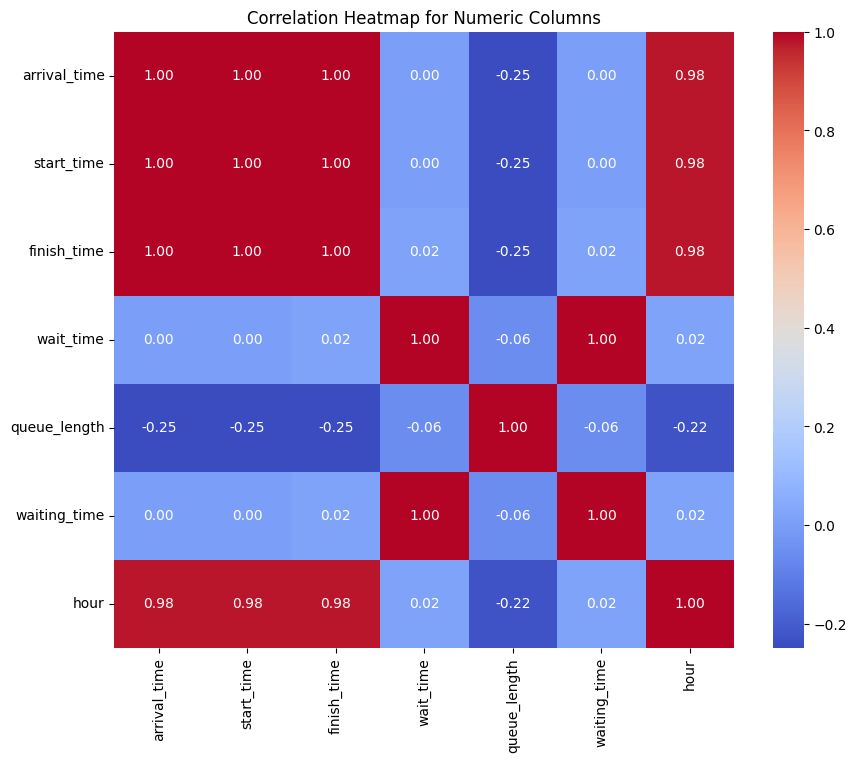

In [9]:
# Check the data types of each column
print(df.dtypes)

# Convert non-numeric columns to numeric, coercing errors to NaN
df_numeric = df.apply(pd.to_numeric, errors='coerce')

# Specify the format for 'arrival_time' and 'start_time'
df['arrival_time'] = pd.to_datetime(df['arrival_time'], format='%d-%m-%Y %H.%M')
df['start_time'] = pd.to_datetime(df['start_time'], format='%d-%m-%Y %H.%M')

# Correlation matrix for numeric columns
correlation_matrix = df.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap for Numeric Columns")
plt.show()

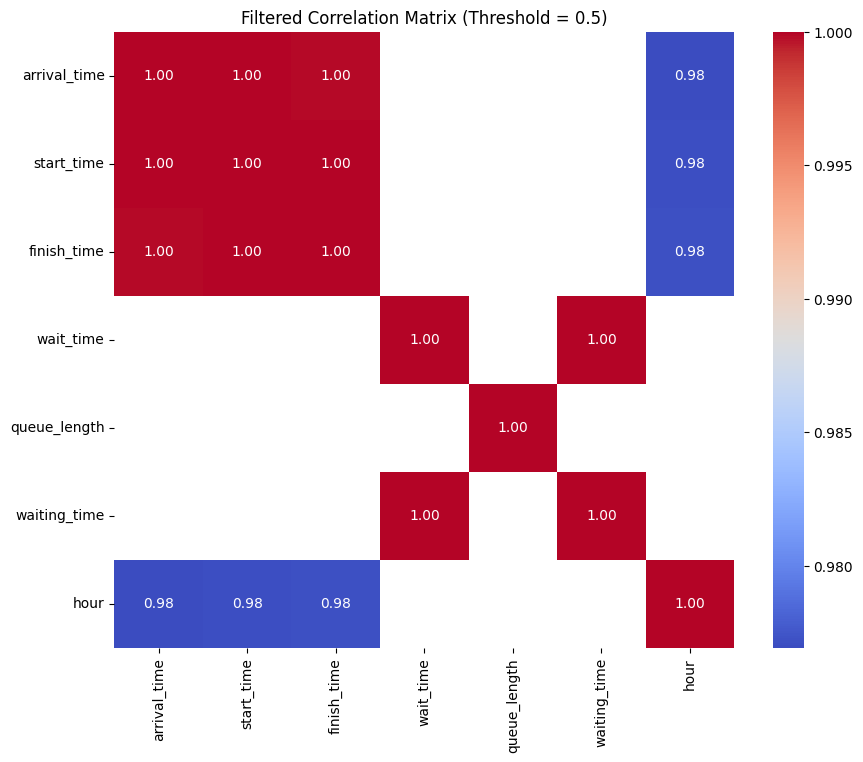

In [10]:
# Specify the correlation threshold
correlation_threshold = 0.5  # You can adjust this value based on your preference

# Filter the correlation matrix
filtered_correlation_matrix = correlation_matrix[abs(correlation_matrix) > correlation_threshold]

# Plot the filtered correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(filtered_correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title(f"Filtered Correlation Matrix (Threshold = {correlation_threshold})")
plt.show()

Highly Correlated Variable Pairs:
              arrival_time  start_time  finish_time  wait_time  queue_length  \
arrival_time         False        True         True      False         False   
start_time            True       False         True      False         False   
finish_time           True        True        False      False         False   
wait_time            False       False        False      False         False   
queue_length         False       False        False      False         False   
waiting_time         False       False        False      False         False   
hour                  True        True         True      False         False   

              waiting_time   hour  
arrival_time         False   True  
start_time           False   True  
finish_time          False   True  
wait_time            False  False  
queue_length         False  False  
waiting_time         False  False  
hour                 False  False  


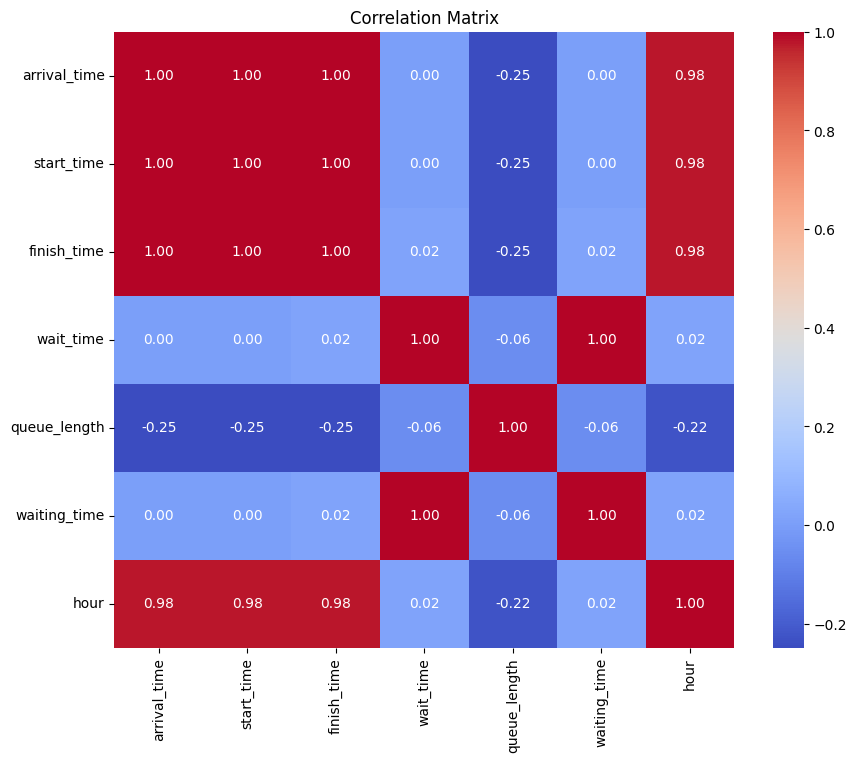

In [11]:
# Specify a high correlation threshold
high_correlation_threshold = 0.9  # You can adjust this value based on your preference

# Find highly correlated pairs
highly_correlated_pairs = (abs(correlation_matrix) > high_correlation_threshold) & (correlation_matrix < 1.0)

# Display highly correlated pairs
print("Highly Correlated Variable Pairs:")
print(highly_correlated_pairs)

# Visualize the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Matrix")
plt.show()

In [12]:
from statsmodels.tsa.api import VAR
from statsmodels.tsa.statespace.varmax import VARMAX
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from math import sqrt

In [13]:
# Select relevant columns for the VAR model
columns_for_var = ['arrival_time', 'start_time', 'finish_time', 'wait_time', 'queue_length', 'waiting_time', 'hour']
df_var = df[columns_for_var]

In [14]:
# Train-test split
train_size = int(len(df_var) * 0.8)
train, test = df_var.iloc[:train_size, :], df_var.iloc[train_size:, :]
print(train.dtypes)

arrival_time    datetime64[ns]
start_time      datetime64[ns]
finish_time     datetime64[ns]
wait_time              float64
queue_length             int64
waiting_time           float64
hour                     int32
dtype: object


In [15]:
print(train.isnull().sum())


arrival_time    0
start_time      0
finish_time     0
wait_time       0
queue_length    0
waiting_time    0
hour            0
dtype: int64


In [16]:
print(train.applymap(np.isreal))


     arrival_time  start_time  finish_time  wait_time  queue_length  \
0            True        True         True       True          True   
1            True        True         True       True          True   
2            True        True         True       True          True   
3            True        True         True       True          True   
4            True        True         True       True          True   
..            ...         ...          ...        ...           ...   
443          True        True         True       True          True   
444          True        True         True       True          True   
445          True        True         True       True          True   
446          True        True         True       True          True   
447          True        True         True       True          True   

     waiting_time  hour  
0            True  True  
1            True  True  
2            True  True  
3            True  True  
4            True

In [17]:
def datetime_transform(X):
    return X.values.reshape(-1, 1)  # Convert datetime to a 2D array

In [18]:
train_array = np.asarray(train.dropna())  # Remove rows with missing values

In [19]:
from sklearn.preprocessing import FunctionTransformer
import numpy as np

def datetime_transform(X):
    return X.values.reshape(-1, 1)  # Convert datetime to a 2D array

datetime_transformer = FunctionTransformer(datetime_transform, validate=False)

In [20]:
def create_dataset(dataset, look_back=1):
    data_X, data_Y = [], []
    for i in range(len(dataset) - look_back):
        a = dataset[i:(i + look_back), 0]
        data_X.append(a)
        data_Y.append(dataset[i + look_back, 0])
    return np.array(data_X), np.array(data_Y)

Epoch 1/100
447/447 - 2s - loss: 0.0396 - 2s/epoch - 5ms/step
Epoch 2/100
447/447 - 1s - loss: 0.0291 - 819ms/epoch - 2ms/step
Epoch 3/100
447/447 - 1s - loss: 0.0287 - 772ms/epoch - 2ms/step
Epoch 4/100
447/447 - 1s - loss: 0.0285 - 813ms/epoch - 2ms/step
Epoch 5/100
447/447 - 1s - loss: 0.0285 - 825ms/epoch - 2ms/step
Epoch 6/100
447/447 - 1s - loss: 0.0283 - 805ms/epoch - 2ms/step
Epoch 7/100
447/447 - 1s - loss: 0.0287 - 768ms/epoch - 2ms/step
Epoch 8/100
447/447 - 1s - loss: 0.0287 - 826ms/epoch - 2ms/step
Epoch 9/100
447/447 - 1s - loss: 0.0284 - 854ms/epoch - 2ms/step
Epoch 10/100
447/447 - 1s - loss: 0.0285 - 873ms/epoch - 2ms/step
Epoch 11/100
447/447 - 1s - loss: 0.0280 - 845ms/epoch - 2ms/step
Epoch 12/100
447/447 - 1s - loss: 0.0285 - 811ms/epoch - 2ms/step
Epoch 13/100
447/447 - 1s - loss: 0.0285 - 782ms/epoch - 2ms/step
Epoch 14/100
447/447 - 1s - loss: 0.0287 - 792ms/epoch - 2ms/step
Epoch 15/100
447/447 - 1s - loss: 0.0286 - 846ms/epoch - 2ms/step
Epoch 16/100
447/447 -

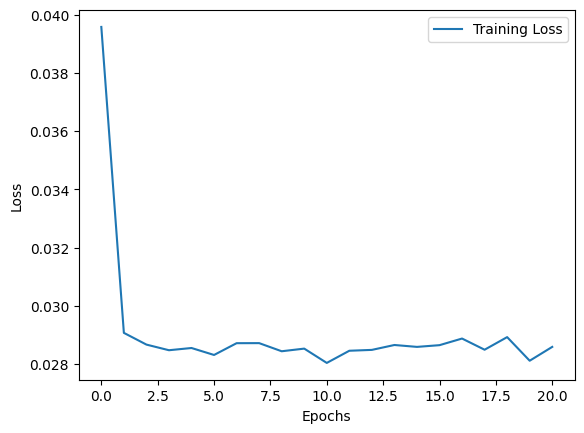

4/4 [==============================] - 0s 3ms/step
Mean Squared Error (MSE) on Test Data: 26.230002056266084


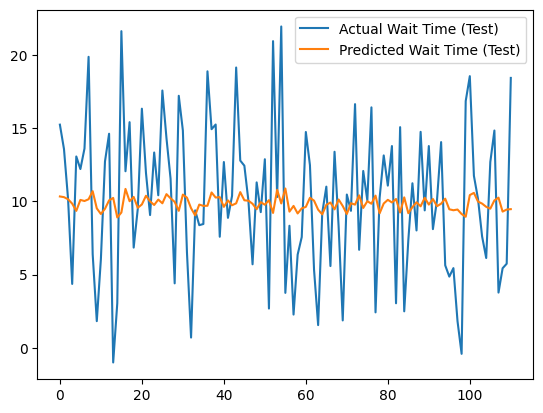

In [21]:
from keras.models import Sequential
from keras.layers import LSTM, Dense, Dropout
from keras.callbacks import EarlyStopping
from sklearn.metrics import mean_squared_error
import numpy as np
import matplotlib.pyplot as plt

# Assuming 'train' is your training set
train_features = train[['wait_time']].values.astype(float)

# Apply Min-Max scaling to the training data
scaler = MinMaxScaler(feature_range=(0, 1))
train_features_scaled = scaler.fit_transform(train_features)

# Create the training dataset with look back
look_back = 1
train_X, train_y = create_dataset(train_features_scaled, look_back)

# Reshape the input data to be in the form [samples, time steps, features]
train_X = np.reshape(train_X, (train_X.shape[0], 1, train_X.shape[1]))

# Build LSTM model
model = Sequential()
model.add(LSTM(50, input_shape=(1, look_back)))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')

# Early stopping to prevent overfitting
early_stopping = EarlyStopping(monitor='loss', patience=10, verbose=1)

# Train the model
history = model.fit(train_X, train_y, epochs=100, batch_size=1, verbose=2, callbacks=[early_stopping])

# Plot training loss
plt.plot(history.history['loss'], label='Training Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Assuming 'test' is your test set
test_features = test[['wait_time']].values.astype(float)

# Apply Min-Max scaling to the test data
test_features_scaled = scaler.transform(test_features)

# Create the test dataset with look back
test_X, test_y = create_dataset(test_features_scaled, look_back)

# Reshape the input data to be in the form [samples, time steps, features]
test_X = np.reshape(test_X, (test_X.shape[0], 1, test_X.shape[1]))

# Make predictions on the test set
test_predict = model.predict(test_X)

# Inverse transform the predictions to the original scale
test_predict = scaler.inverse_transform(test_predict)
test_y = scaler.inverse_transform([test_y])

# Calculate MSE
mse = mean_squared_error(test_y.flatten(), test_predict.flatten())
print(f'Mean Squared Error (MSE) on Test Data: {mse}')

# Plot the results
plt.plot(test_y.flatten(), label='Actual Wait Time (Test)')
plt.plot(test_predict.flatten(), label='Predicted Wait Time (Test)')
plt.legend()
plt.show()

4/4 [==============================] - 0s 3ms/step


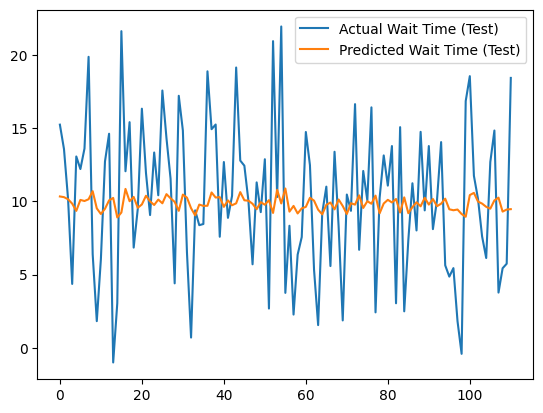

In [22]:
# Assuming 'test' is your test set
test_features = test[['wait_time']].values.astype(float)
test_features_scaled = scaler.transform(test_features)

# Create the test dataset with look back
test_X, test_y = create_dataset(test_features_scaled, look_back)

# Reshape the input data to be in the form [samples, time steps, features]
test_X = np.reshape(test_X, (test_X.shape[0], 1, test_X.shape[1]))

# Make predictions on the test set
test_predict = model.predict(test_X)

# Inverse transform the predictions to the original scale
test_predict = scaler.inverse_transform(test_predict)
test_y = scaler.inverse_transform([test_y])

# Plot the results
plt.plot(test_y.flatten(), label='Actual Wait Time (Test)')
plt.plot(test_predict.flatten(), label='Predicted Wait Time (Test)')
plt.legend()
plt.show()

In [23]:
# Assuming 'test' is your test set
test_features = test[['wait_time']].values.astype(float)
test_features_scaled = scaler.transform(test_features)

# Create the test dataset with look back
test_X, test_y = create_dataset(test_features_scaled, look_back)

# Reshape the input data to be in the form [samples, time steps, features]
test_X = np.reshape(test_X, (test_X.shape[0], 1, test_X.shape[1]))

# Make predictions on the test set
test_predict = model.predict(test_X)

# Inverse transform the predictions to the original scale
test_predict = scaler.inverse_transform(test_predict)
test_y = scaler.inverse_transform([test_y])

# Print the actual and predicted values
print("Actual Wait Time (Test):", test_y.flatten())
print("Predicted Wait Time (Test):", test_predict.flatten())

4/4 [==============================] - 0s 2ms/step
Actual Wait Time (Test): [15.23 13.56 10.13  4.36 13.06 12.2  13.6  19.86  6.38  1.82  6.05 12.72
 14.61 -1.    3.05 21.61 12.05 15.4   6.84  9.49 16.32 11.93  9.06 13.33
 10.41 17.56 14.31 11.54  4.4  17.2  14.83  6.5   0.7   9.38  8.37  8.45
 18.87 14.92 15.24  7.58 12.68  8.87 10.37 19.13 12.78 12.43 10.01  5.7
 11.29  9.26 12.87  2.68 20.93 10.29 21.93  3.75  8.33  2.27  6.36  7.56
 14.73 12.47  5.33  1.55  9.2  11.    5.58 13.38  8.26  1.87 10.46  9.35
 16.63  6.69 12.07 10.06 16.41  2.42 10.24 13.13 11.07 13.77  3.04 15.06
  2.49  7.35 11.23  8.01 14.74  9.38 13.77  8.1  10.09 14.04  5.63  4.86
  5.44  1.82 -0.41 16.84 18.54 11.74 10.16  7.6   6.13 12.68 14.83  3.77
  5.43  5.74 18.42]
Predicted Wait Time (Test): [10.329369  10.282954  10.137121   9.83967    9.346225  10.093586
 10.01884   10.140607  10.690414   9.517926   9.132031   9.489796
 10.064012  10.228738   8.896577   9.235513  10.845525  10.00582
 10.297836   9.557186  

Epoch 1/50
14/14 - 1s - loss: 0.1369 - val_loss: 0.0722 - 1s/epoch - 104ms/step
Epoch 2/50
14/14 - 0s - loss: 0.0442 - val_loss: 0.0369 - 110ms/epoch - 8ms/step
Epoch 3/50


/opt/conda/lib/python3.10/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


14/14 - 0s - loss: 0.0317 - val_loss: 0.0310 - 102ms/epoch - 7ms/step
Epoch 4/50
14/14 - 0s - loss: 0.0302 - val_loss: 0.0304 - 121ms/epoch - 9ms/step
Epoch 5/50
14/14 - 0s - loss: 0.0297 - val_loss: 0.0303 - 110ms/epoch - 8ms/step
Epoch 6/50
14/14 - 0s - loss: 0.0297 - val_loss: 0.0303 - 128ms/epoch - 9ms/step
Epoch 7/50
14/14 - 0s - loss: 0.0296 - val_loss: 0.0302 - 118ms/epoch - 8ms/step
Epoch 8/50
14/14 - 0s - loss: 0.0294 - val_loss: 0.0302 - 112ms/epoch - 8ms/step
Epoch 9/50
14/14 - 0s - loss: 0.0294 - val_loss: 0.0302 - 98ms/epoch - 7ms/step
Epoch 10/50
14/14 - 0s - loss: 0.0299 - val_loss: 0.0302 - 91ms/epoch - 7ms/step
Epoch 11/50
14/14 - 0s - loss: 0.0298 - val_loss: 0.0304 - 94ms/epoch - 7ms/step
Epoch 12/50
14/14 - 0s - loss: 0.0293 - val_loss: 0.0300 - 107ms/epoch - 8ms/step
Epoch 13/50
14/14 - 0s - loss: 0.0295 - val_loss: 0.0303 - 100ms/epoch - 7ms/step
Epoch 14/50
14/14 - 0s - loss: 0.0293 - val_loss: 0.0299 - 105ms/epoch - 7ms/step
Epoch 15/50
14/14 - 0s - loss: 0.0290

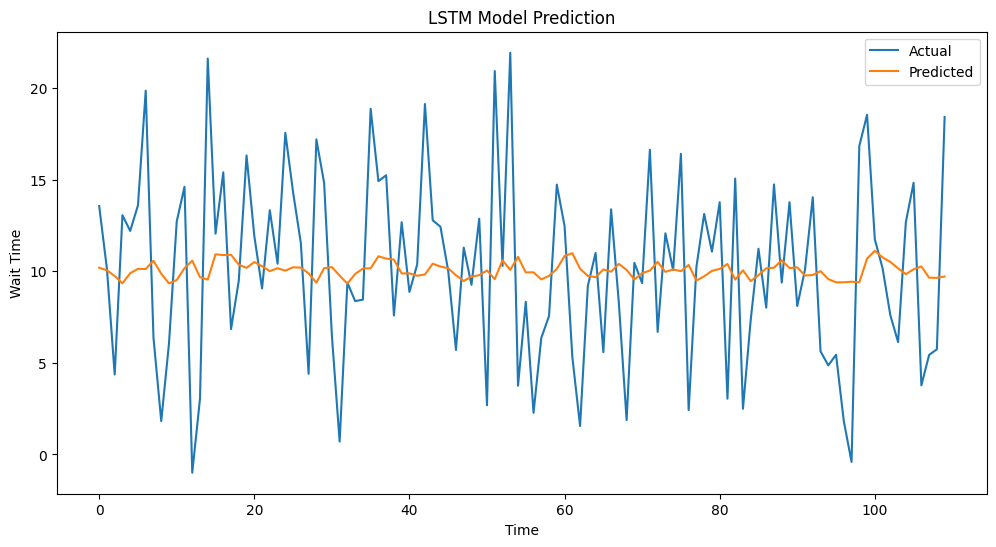

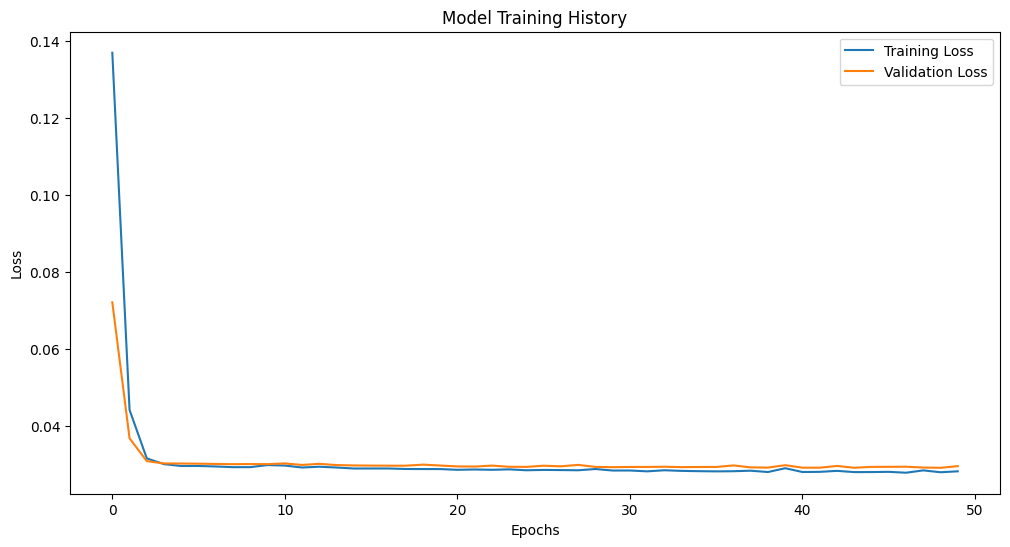

In [24]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
import matplotlib.pyplot as plt

# Assuming your DataFrame is named 'df' with a datetime index
df['timestamp'] = pd.to_datetime(df['finish_time'])
df.set_index('timestamp', inplace=True)

# Feature scaling
scaler = MinMaxScaler()
df_scaled = scaler.fit_transform(df[['wait_time']])

# Create sequences and labels
def create_sequences(data, seq_length):
    sequences, labels = [], []
    for i in range(len(data) - seq_length):
        seq = data[i:i+seq_length]
        label = data[i+seq_length]
        sequences.append(seq)
        labels.append(label)
    return np.array(sequences), np.array(labels)

# Define sequence length
sequence_length = 10

# Create sequences and labels
X, y = create_sequences(df_scaled, sequence_length)

# Split the data into training and testing sets
train_size = int(len(X) * 0.8)
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

# Build the LSTM model
model = Sequential()
model.add(LSTM(units=50, activation='relu', input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(Dense(units=1))
model.compile(optimizer='adam', loss='mean_squared_error')

# Define callbacks
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
model_checkpoint = ModelCheckpoint('best_model.h5', save_best_only=True)

# Train the model
history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_test, y_test),
                    callbacks=[early_stopping, model_checkpoint], verbose=2)

# Load the best model
best_model = load_model('best_model.h5')

# Make predictions
y_pred = best_model.predict(X_test)

# Inverse transform the scaled predictions and labels
y_pred_inv = scaler.inverse_transform(y_pred)
y_test_inv = scaler.inverse_transform(y_test.reshape(-1, 1))

# Calculate RMSE
rmse = np.sqrt(mean_squared_error(y_test_inv, y_pred_inv))
print(f'Root Mean Squared Error (RMSE): {rmse}')

# Plot the results
plt.figure(figsize=(12, 6))
plt.plot(y_test_inv, label='Actual')
plt.plot(y_pred_inv, label='Predicted')
plt.title('LSTM Model Prediction')
plt.xlabel('Time')
plt.ylabel('Wait Time')
plt.legend()
plt.show()

# Plot training history
plt.figure(figsize=(12, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Training History')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()